In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [40]:
# Load data
human_data = pd.read_csv('./data/human_game_data.csv')
rl_data = pd.read_csv('./data/RL_game_data.csv')

In [41]:
# Convert date columns to datetime format
human_data['Game Date'] = pd.to_datetime(human_data['Game Date'])
rl_data['Game Date'] = pd.to_datetime(rl_data['Game Date'])

# Convert time columns to timedelta format
human_data['Elapsed Time'] = pd.to_timedelta(human_data['Elapsed Time'])
rl_data['Elapsed Time'] = pd.to_timedelta(rl_data['Elapsed Time'])

threshold_duration = pd.to_timedelta('00:00:10')  # 10 seconds
# Filter out early quits for human data
human_data = human_data[(human_data['Asteroids Hit'] > 2) | (human_data['Elapsed Time'] > threshold_duration)]
rl_data = rl_data[(rl_data['Asteroids Hit'] >= 2) | (rl_data['Elapsed Time'] >= threshold_duration)]


In [42]:
# Basic statistics
def get_statistics(data, label):
    print(f"Statistics for {label}:")
    display(data.describe())
    print("\n")

get_statistics(human_data, "Human")
get_statistics(rl_data, "RL Agent")

print(human_data)
print(rl_data)

Statistics for Human:


,Game Date,Elapsed Time,Score,Accuracy,Asteroids Hit
count,78,78,78.000000,78.000000,78.000000
mean,2024-06-18 19:41:32.307692288,0 days 00:00:00.000000061,3319.025641,0.578590,34.435897
min,2024-06-07 00:00:00,0 days 00:00:00.000000011,668.000000,0.180000,7.000000
25%,2024-06-11 00:00:00,0 days 00:00:00.000000038,1686.500000,0.440000,17.250000
50%,2024-06-15 00:00:00,0 days 00:00:00.000000053,2536.000000,0.560000,26.500000
75%,2024-06-30 18:00:00,0 days 00:00:00.000000073,3921.000000,0.737500,41.000000
max,2024-07-04 00:00:00,0 days 00:00:00.000000210,17630.000000,1.000000,181.000000
std,NaN,0 days 00:00:00.000000037,2764.147923,0.190179,28.757648




Statistics for RL Agent:


,Game Date,Elapsed Time,Score,Accuracy,Asteroids Hit
count,57,57,57.000000,57.00000,57.000000
mean,2024-07-03 00:00:00,0 days 00:00:00.000000077,3491.964912,0.44193,36.596491
min,2024-07-03 00:00:00,0 days 00:00:00.000000037,2368.000000,0.33000,25.000000
25%,2024-07-03 00:00:00,0 days 00:00:00.000000048,3052.000000,0.39000,32.000000
50%,2024-07-03 00:00:00,0 days 00:00:00.000000058,3430.000000,0.43000,36.000000
75%,2024-07-03 00:00:00,0 days 00:00:00.000000065,3798.000000,0.48000,40.000000
max,2024-07-03 00:00:00,0 days 00:00:00.000001132,5018.000000,0.65000,52.000000
std,NaN,0 days 00:00:00.000000143,611.893255,0.06621,6.315682




    Game Date Game Time              Elapsed Time               Reason  Score  \
0  2024-06-07  10:39:11 0 days 00:00:00.000000021          Player Quit   1656   
1  2024-06-07  10:40:28 0 days 00:00:00.000000026  Spacecraft Health 0   2126   
2  2024-06-07  10:43:18 0 days 00:00:00.000000047          Player Quit   2244   
3  2024-06-07  11:40:40 0 days 00:00:00.000000023          Player Quit   1466   
5  2024-06-07  18:18:40 0 days 00:00:00.000000042  Spacecraft Health 0    776   
..        ...       ...                       ...                  ...    ...   
76 2024-07-04  08:14:24 0 days 00:00:00.000000019          Player Quit    978   
77 2024-07-04  08:15:01 0 days 00:00:00.000000071    Spacecraft Fuel 0   1362   
78 2024-07-04  08:16:16 0 days 00:00:00.000000041  Spacecraft Health 0   1356   
79 2024-07-04  08:17:12 0 days 00:00:00.000000053  Spacecraft Health 0   2442   
80 2024-07-04  08:18:09 0 days 00:00:00.000000091  Spacecraft Health 0   3996   

    Accuracy  Asteroids H

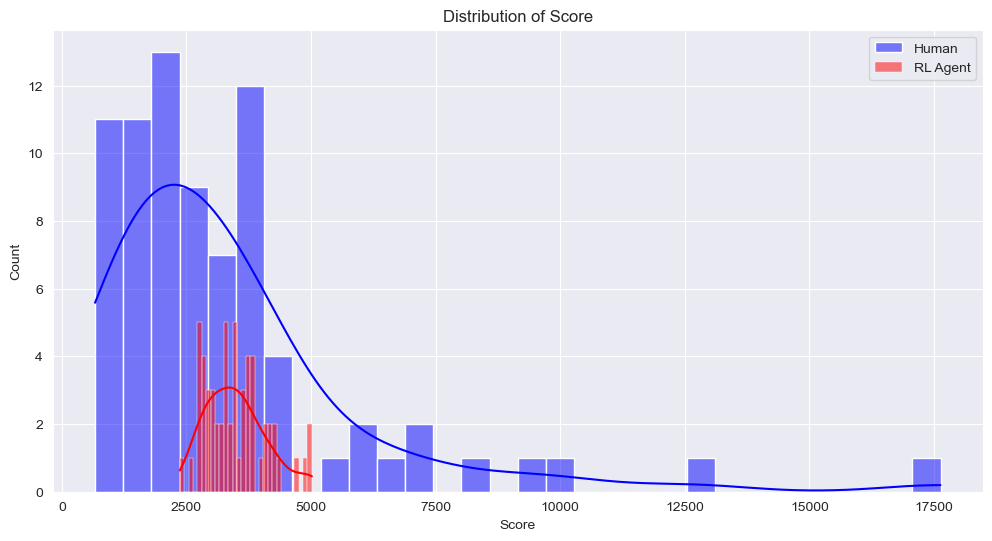

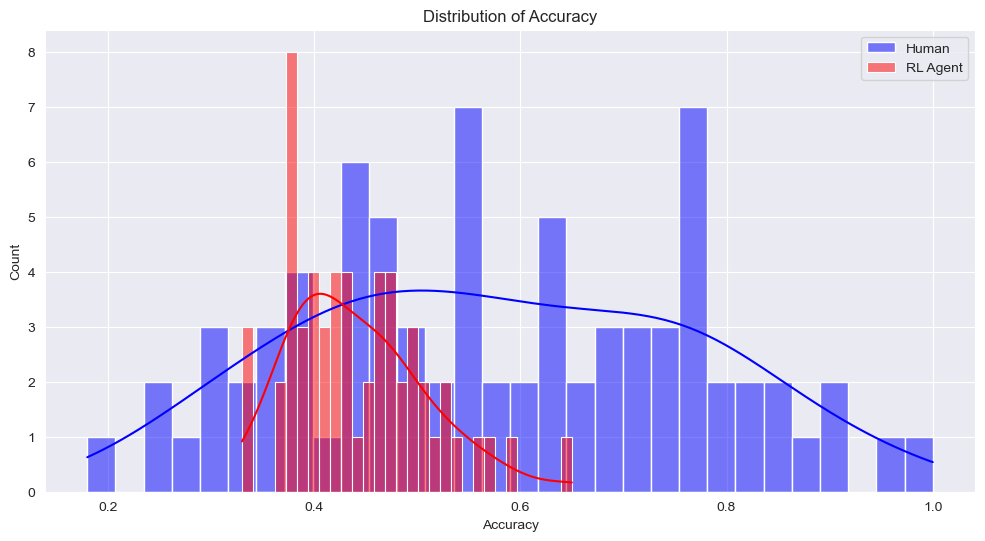

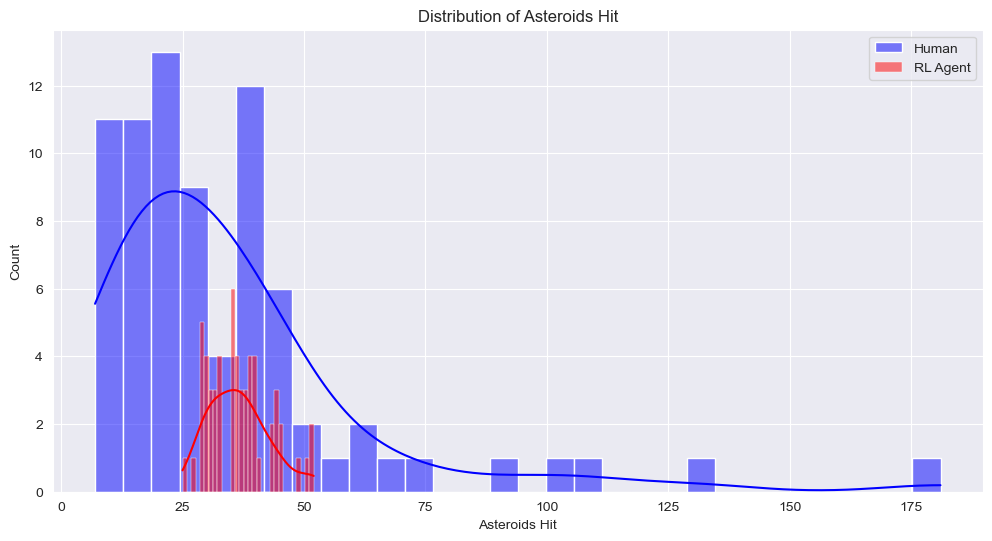

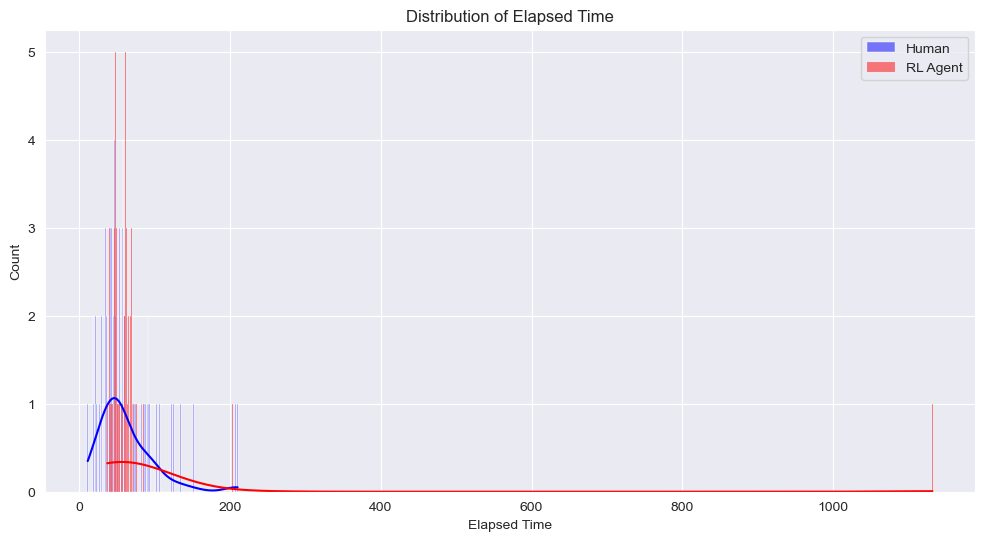

In [43]:
def plot_histograms(human_data, rl_data, column, bins=30):
    plt.figure(figsize=(12, 6))
    sns.histplot(human_data[column], kde=True, label='Human', color='blue', bins=bins)
    sns.histplot(rl_data[column], kde=True, label='RL Agent', color='red', bins=bins)
    plt.title(f"Distribution of {column}")
    plt.legend()
    plt.show()

plot_histograms(human_data, rl_data, 'Score')
plot_histograms(human_data, rl_data, 'Accuracy')
plot_histograms(human_data, rl_data, 'Asteroids Hit')
plot_histograms(human_data, rl_data, 'Elapsed Time', bins=50)

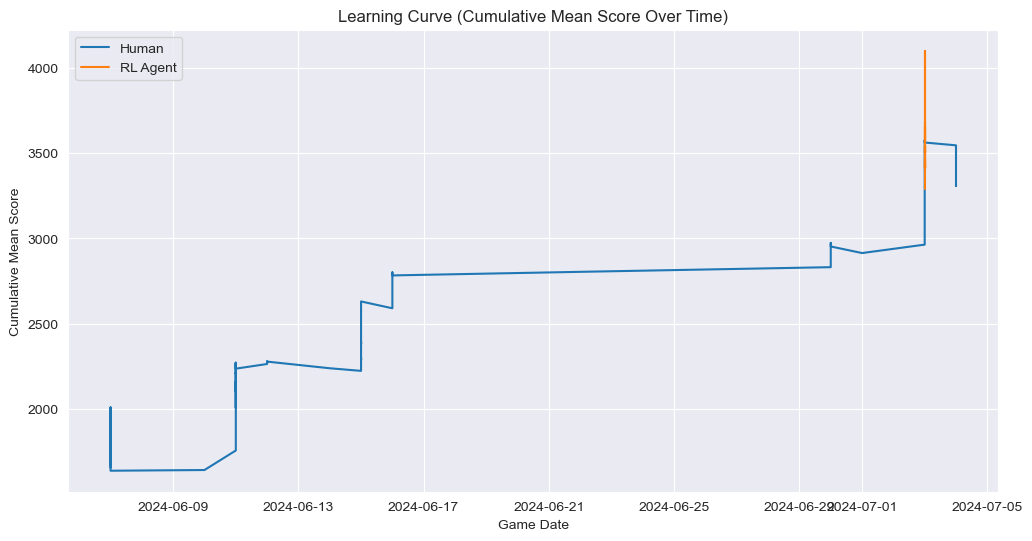

In [44]:
def plot_learning_curve(data, label):
    data = data.sort_values('Game Date')
    data['Cumulative Mean Score'] = data['Score'].expanding().mean()
    plt.plot(data['Game Date'], data['Cumulative Mean Score'], label=label)

plt.figure(figsize=(12, 6))
plot_learning_curve(human_data, 'Human')
plot_learning_curve(rl_data, 'RL Agent')
plt.title('Learning Curve (Cumulative Mean Score Over Time)')
plt.xlabel('Game Date')
plt.ylabel('Cumulative Mean Score')
plt.legend()
plt.show()


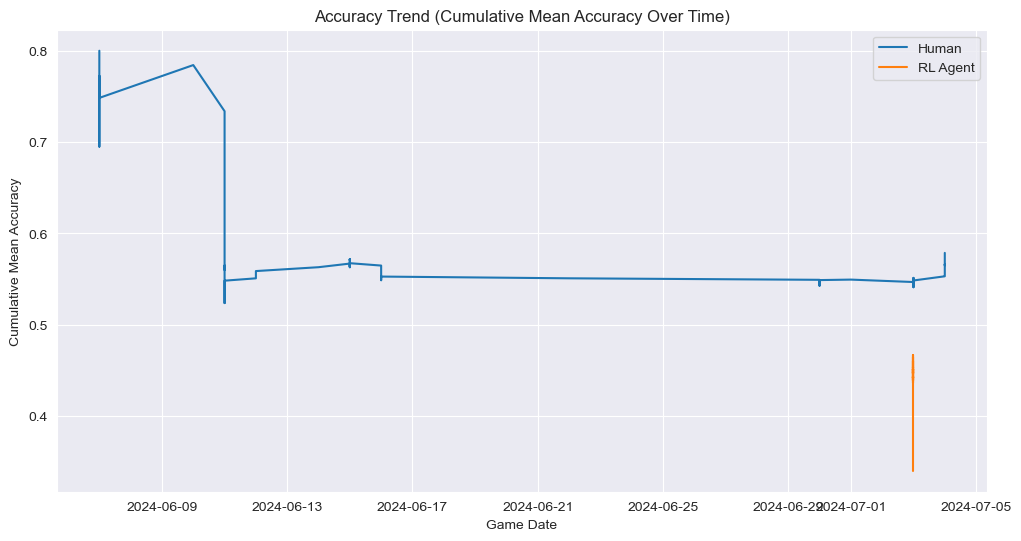

In [45]:
def plot_accuracy_trend(data, label):
    data = data.sort_values('Game Date')
    data['Cumulative Mean Accuracy'] = data['Accuracy'].expanding().mean()
    plt.plot(data['Game Date'], data['Cumulative Mean Accuracy'], label=label)

plt.figure(figsize=(12, 6))
plot_accuracy_trend(human_data, 'Human')
plot_accuracy_trend(rl_data, 'RL Agent')
plt.title('Accuracy Trend (Cumulative Mean Accuracy Over Time)')
plt.xlabel('Game Date')
plt.ylabel('Cumulative Mean Accuracy')
plt.legend()
plt.show()


In [46]:
def compare_means(human_data, rl_data, column):
    t_stat, p_val = stats.ttest_ind(human_data[column], rl_data[column])
    print(f"T-test for {column}: t_stat={t_stat}, p_val={p_val}")

compare_means(human_data, rl_data, 'Score')
compare_means(human_data, rl_data, 'Accuracy')
compare_means(human_data, rl_data, 'Asteroids Hit')


T-test for Score: t_stat=-0.46368862152185775, p_val=0.6436288218634051
T-test for Accuracy: t_stat=5.195561745636393, p_val=7.48601321848013e-07
T-test for Asteroids Hit: t_stat=-0.5569697177841108, p_val=0.5784841794220872


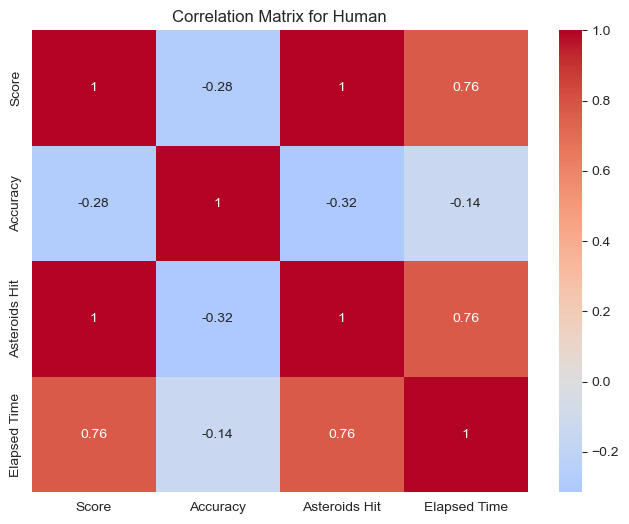

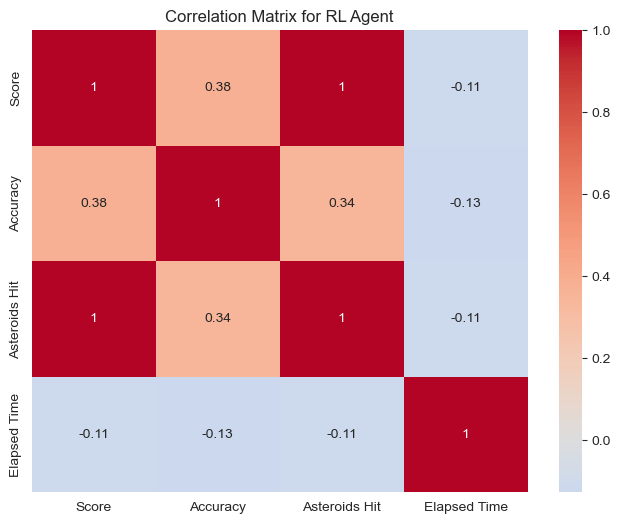

In [47]:
def plot_correlation_matrix(data, label):
    corr = data[['Score', 'Accuracy', 'Asteroids Hit', 'Elapsed Time']].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
    plt.title(f'Correlation Matrix for {label}')
    plt.show()

plot_correlation_matrix(human_data, 'Human')
plot_correlation_matrix(rl_data, 'RL Agent')


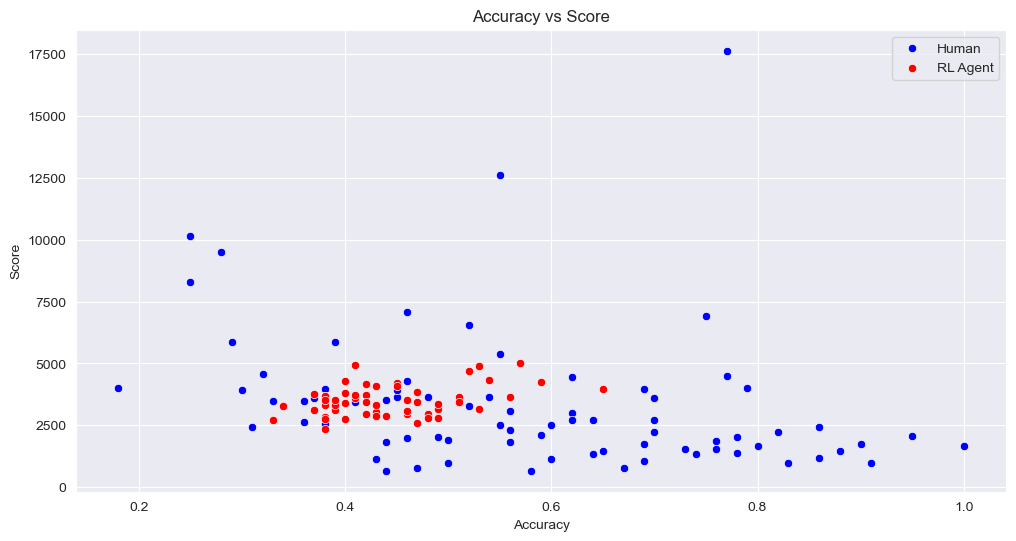

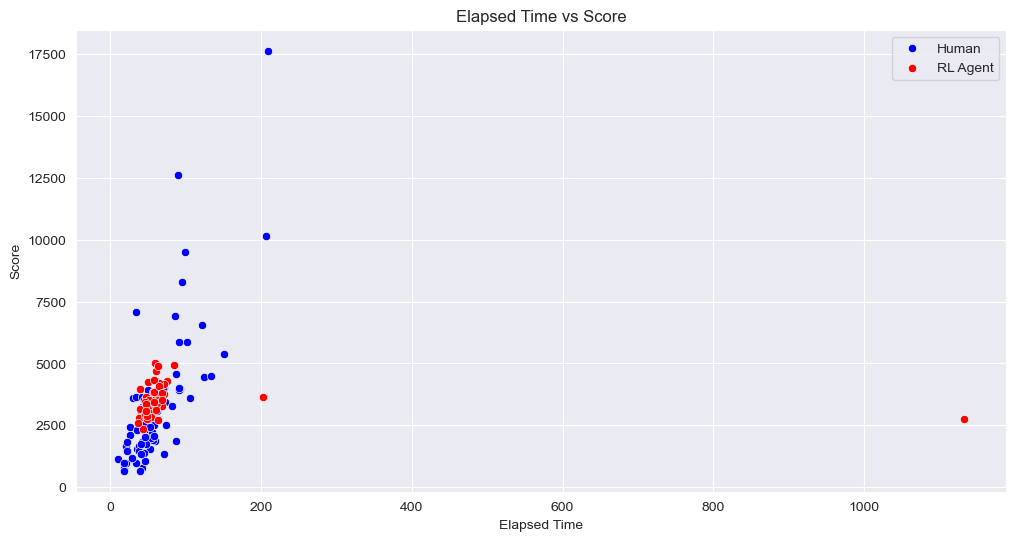

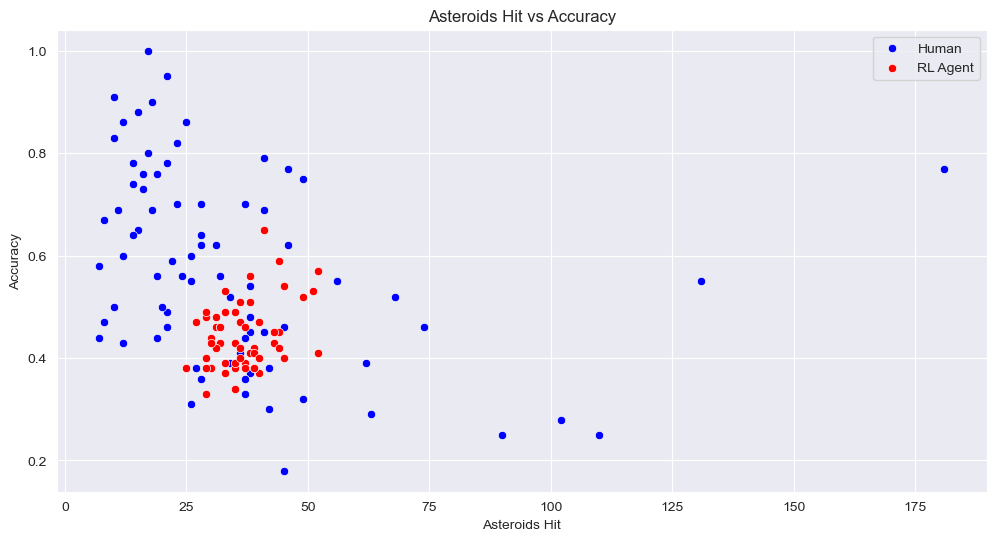

In [48]:
def plot_pairwise_comparison(human_data, rl_data, x_col, y_col):
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x=human_data[x_col], y=human_data[y_col], label='Human', color='blue')
    sns.scatterplot(x=rl_data[x_col], y=rl_data[y_col], label='RL Agent', color='red')
    plt.title(f'{x_col} vs {y_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.legend()
    plt.show()

plot_pairwise_comparison(human_data, rl_data, 'Accuracy', 'Score')
plot_pairwise_comparison(human_data, rl_data, 'Elapsed Time', 'Score')
plot_pairwise_comparison(human_data, rl_data, 'Asteroids Hit', 'Accuracy')


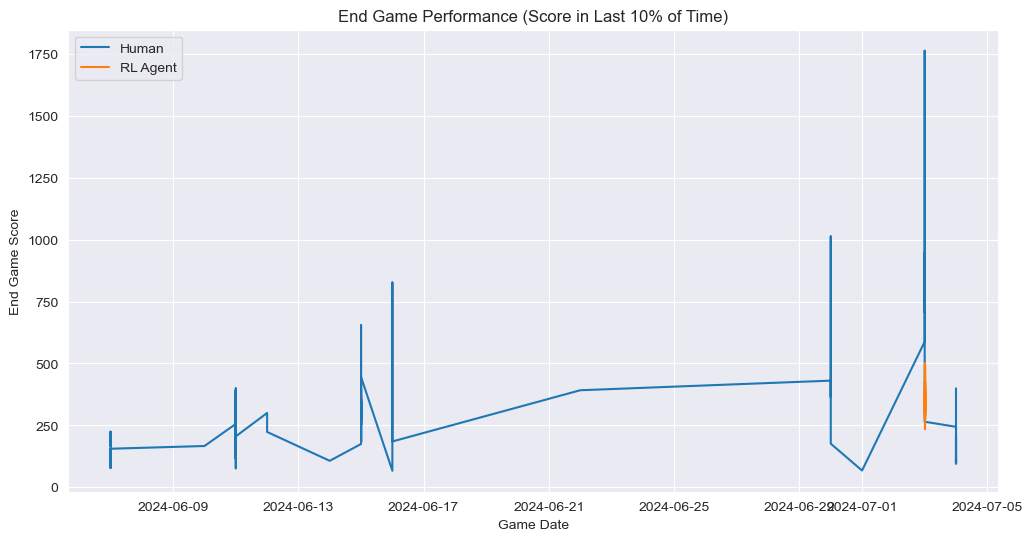

In [49]:
def plot_end_game_performance(data, label):
    data['Last 10% Time'] = data['Elapsed Time'] * 0.1
    data['End Game Score'] = data['Score'] * 0.1
    data = data.sort_values('Game Date')
    plt.plot(data['Game Date'], data['End Game Score'], label=label)

plt.figure(figsize=(12, 6))
plot_end_game_performance(human_data, 'Human')
plot_end_game_performance(rl_data, 'RL Agent')
plt.title('End Game Performance (Score in Last 10% of Time)')
plt.xlabel('Game Date')
plt.ylabel('End Game Score')
plt.legend()
plt.show()


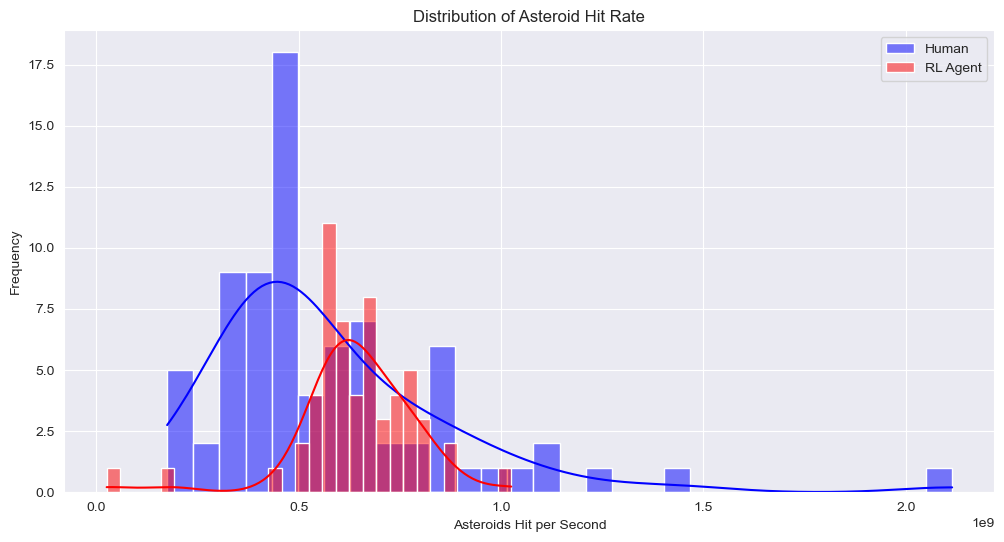

In [50]:
def calculate_avg_rate(data):
    data['Asteroid Hit Rate'] = data['Asteroids Hit'] / data['Elapsed Time'].dt.total_seconds()
    return data

human_data = calculate_avg_rate(human_data)
rl_data = calculate_avg_rate(rl_data)

def plot_asteroid_hit_rate(human_data, rl_data):
    plt.figure(figsize=(12, 6))
    sns.histplot(human_data['Asteroid Hit Rate'], kde=True, label='Human', color='blue', bins=30)
    sns.histplot(rl_data['Asteroid Hit Rate'], kde=True, label='RL Agent', color='red', bins=30)
    plt.title('Distribution of Asteroid Hit Rate')
    plt.xlabel('Asteroids Hit per Second')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

plot_asteroid_hit_rate(human_data, rl_data)

In [51]:
def calculate_consistency(data, label):
    print(f"Consistency (Standard Deviation) for {label}:")
    consistency_metrics = data[['Score', 'Accuracy', 'Asteroids Hit']].std()
    print(consistency_metrics)
    print("\n")

calculate_consistency(human_data, "Human")
calculate_consistency(rl_data, "RL Agent")


Consistency (Standard Deviation) for Human:
Score            2764.147923
Accuracy            0.190179
Asteroids Hit      28.757648
dtype: float64


Consistency (Standard Deviation) for RL Agent:
Score            611.893255
Accuracy           0.066210
Asteroids Hit      6.315682
dtype: float64




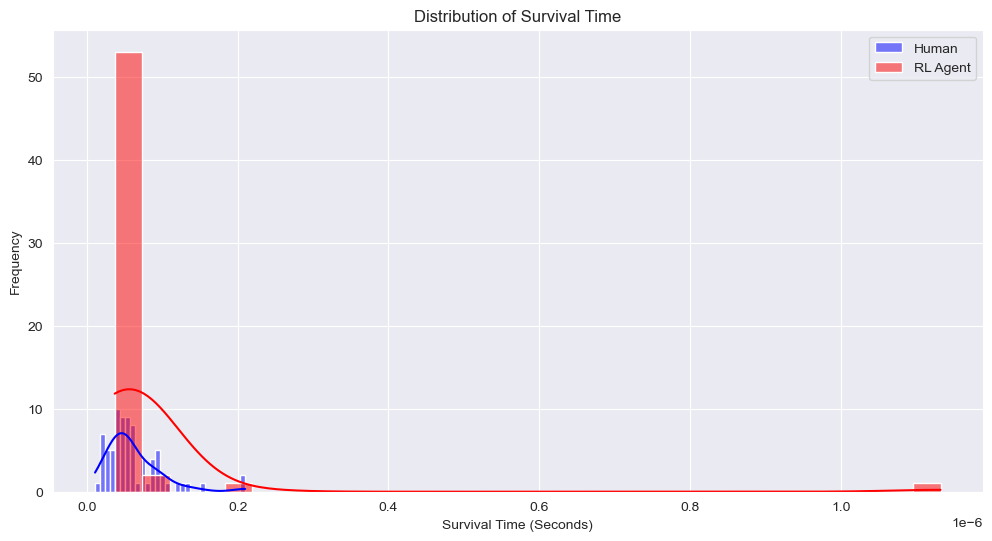

In [52]:
def plot_survival_time(human_data, rl_data):
    plt.figure(figsize=(12, 6))
    sns.histplot(human_data['Elapsed Time'].dt.total_seconds(), kde=True, label='Human', color='blue', bins=30)
    sns.histplot(rl_data['Elapsed Time'].dt.total_seconds(), kde=True, label='RL Agent', color='red', bins=30)
    plt.title('Distribution of Survival Time')
    plt.xlabel('Survival Time (Seconds)')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

plot_survival_time(human_data, rl_data)


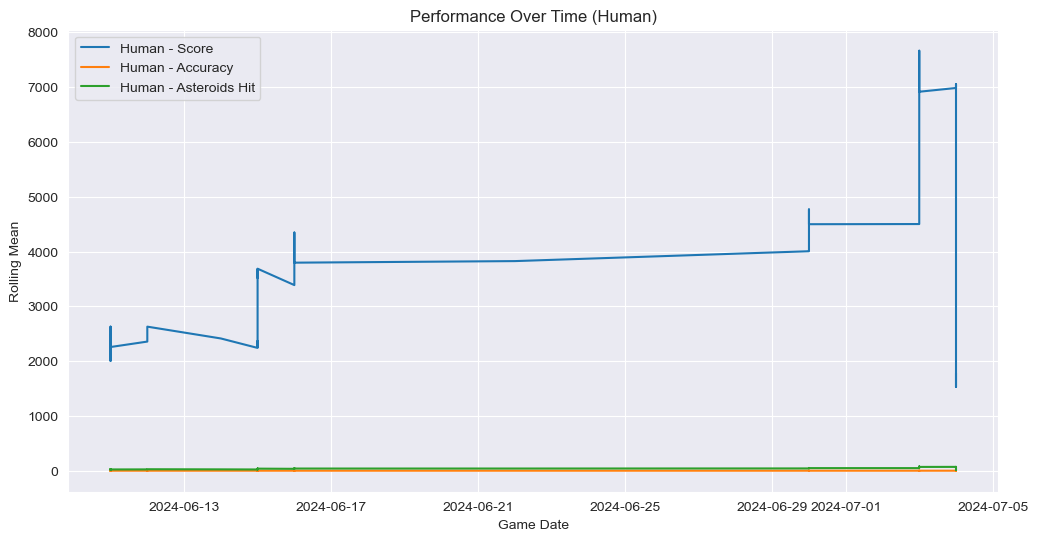

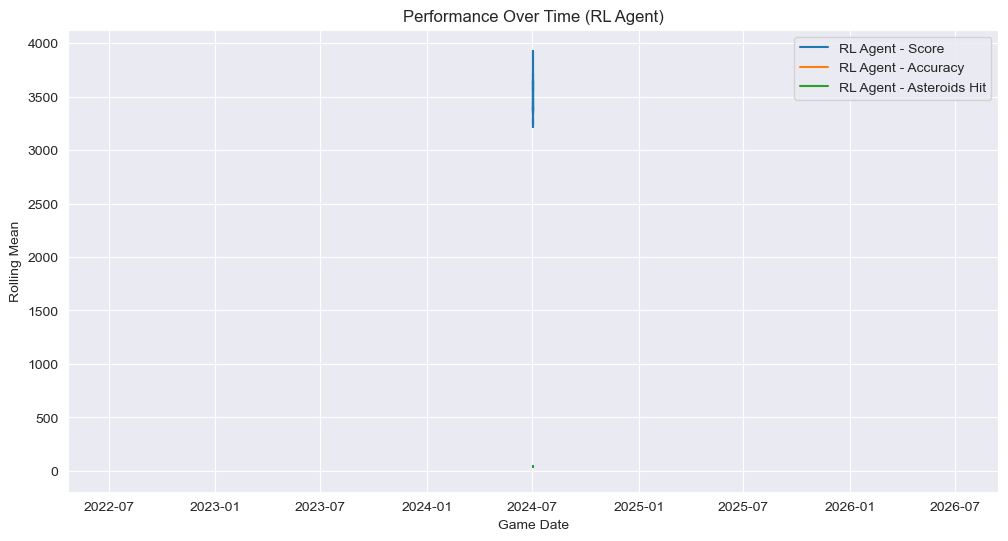

In [53]:
def plot_performance_over_time(data, label):
    data = data.sort_values('Game Date')
    data['Rolling Mean Score'] = data['Score'].rolling(window=10).mean()
    data['Rolling Mean Accuracy'] = data['Accuracy'].rolling(window=10).mean()
    data['Rolling Mean Asteroids Hit'] = data['Asteroids Hit'].rolling(window=10).mean()

    plt.figure(figsize=(12, 6))
    plt.plot(data['Game Date'], data['Rolling Mean Score'], label=f'{label} - Score')
    plt.plot(data['Game Date'], data['Rolling Mean Accuracy'], label=f'{label} - Accuracy')
    plt.plot(data['Game Date'], data['Rolling Mean Asteroids Hit'], label=f'{label} - Asteroids Hit')
    plt.title(f'Performance Over Time ({label})')
    plt.xlabel('Game Date')
    plt.ylabel('Rolling Mean')
    plt.legend()
    plt.show()

plot_performance_over_time(human_data, 'Human')
plot_performance_over_time(rl_data, 'RL Agent')